<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Comparative-Plotting-of-EOS-Isotherms" data-toc-modified-id="Comparative-Plotting-of-EOS-Isotherms-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Comparative Plotting of EOS Isotherms</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Pressure-Functions" data-toc-modified-id="Pressure-Functions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Pressure Functions</a></span><ul class="toc-item"><li><span><a href="#vdw" data-toc-modified-id="vdw-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>vdw</a></span></li><li><span><a href="#GvdW(S)" data-toc-modified-id="GvdW(S)-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>GvdW(S)</a></span></li><li><span><a href="#GvdW(HS-B2)" data-toc-modified-id="GvdW(HS-B2)-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>GvdW(HS-B2)</a></span></li><li><span><a href="#GvdW(I)" data-toc-modified-id="GvdW(I)-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>GvdW(I)</a></span></li><li><span><a href="#GvdW(CS)" data-toc-modified-id="GvdW(CS)-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>GvdW(CS)</a></span></li><li><span><a href="#GvdW(VHS-I)" data-toc-modified-id="GvdW(VHS-I)-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>GvdW(VHS-I)</a></span></li></ul></li><li><span><a href="#Widgets" data-toc-modified-id="Widgets-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Widgets</a></span></li><li><span><a href="#Pressure-checkboxes" data-toc-modified-id="Pressure-checkboxes-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Pressure checkboxes</a></span><ul class="toc-item"><li><span><a href="#vdw" data-toc-modified-id="vdw-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>vdw</a></span></li><li><span><a href="#GvdW(S)" data-toc-modified-id="GvdW(S)-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>GvdW(S)</a></span></li><li><span><a href="#GvdW(HS-B2)" data-toc-modified-id="GvdW(HS-B2)-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>GvdW(HS-B2)</a></span></li><li><span><a href="#GvdW(I)" data-toc-modified-id="GvdW(I)-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>GvdW(I)</a></span></li><li><span><a href="#GvdW(CS)" data-toc-modified-id="GvdW(CS)-1.4.5"><span class="toc-item-num">1.4.5&nbsp;&nbsp;</span>GvdW(CS)</a></span></li><li><span><a href="#GvdW(VHS-I)" data-toc-modified-id="GvdW(VHS-I)-1.4.6"><span class="toc-item-num">1.4.6&nbsp;&nbsp;</span>GvdW(VHS-I)</a></span></li><li><span><a href="#Pressure-checkbox-frame" data-toc-modified-id="Pressure-checkbox-frame-1.4.7"><span class="toc-item-num">1.4.7&nbsp;&nbsp;</span>Pressure checkbox frame</a></span></li><li><span><a href="#Scaling-Parameters" data-toc-modified-id="Scaling-Parameters-1.4.8"><span class="toc-item-num">1.4.8&nbsp;&nbsp;</span>Scaling Parameters</a></span></li><li><span><a href="#do_plot()" data-toc-modified-id="do_plot()-1.4.9"><span class="toc-item-num">1.4.9&nbsp;&nbsp;</span>do_plot()</a></span></li></ul></li></ul></li><li><span><a href="#Explanation-of-GUI" data-toc-modified-id="Explanation-of-GUI-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Explanation of GUI</a></span></li><li><span><a href="#Exercises" data-toc-modified-id="Exercises-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercises</a></span></li></ul></div>

## Comparative Plotting of EOS Isotherms

In [1]:
# from IPython.display import display
# from IPython.display import HTML
# import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# # This line will hide code by default when the notebook is exported as HTML
# di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# # This line will add a button to toggle visibility of code blocks, for use with the HTML export version
# di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

### Imports

In [2]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import ipywidgets as widgets
from ipywidgets import Layout

from pylab import rcParams
from scipy.optimize import fsolve

### Pressure Functions

#### vdw

In [3]:
pdic = {}
gasdic = {}
liqdic = {}
gasdici = {}
liqdici = {}

plist = []
vdwa = 16. * np.pi / 9.


def classic_vdw(rho, t=1.):
    v = 1. / rho
    p = t / (v - 2. * np.pi / 3) - vdwa * rho * rho
    return p


with open('vdw.pkl', 'rb') as f:
    data = pickle.load(f)
fg, fl, rhoc, tc, pc = data
pdic['vdw'] = (classic_vdw, rhoc, tc, pc)
gasdic['vdw'] = fg
liqdic['vdw'] = fl

plist.append('vdw')

#### GvdW(S)

In [4]:
def gvdws(rho, t=1.):
    v = 1. / rho
    p = t / (v - 1.) - vdwa * rho * rho
    return p


with open('gvdw-s.pkl', 'rb') as f:
    data = pickle.load(f)
fg, fl, rhoc, tc, pc = data
pdic['GvdW(S)'] = (gvdws, rhoc, tc, pc)
plist.append('GvdW(S)')
gasdic['GvdW(S)'] = fg
liqdic['GvdW(S)'] = fl

#### GvdW(HS-B2)

In [5]:
def gvdwhsb2(rho, t=1.):
    v = 1. / rho
    c = 2. * np.pi / 3. - 1.
    p = t / (v - 1) + (t * c - vdwa) * rho * rho
    return p


with open('gvdw-hsb2.pkl', 'rb') as f:
    data = pickle.load(f)
    data2 = pickle.load(f)
fg, fl, rhoc, tc, pc = data
fgi, fli = data2
pdic['GvdW(HS-B2)'] = (gvdwhsb2, rhoc, tc, pc)
plist.append('GvdW(HS-B2)')
gasdic['GvdW(HS-B2)'] = fg
liqdic['GvdW(HS-B2)'] = fl
gasdici['GvdW(HS-B2)'] = fgi
liqdici['GvdW(HS-B2)'] = fli

#### GvdW(I)

In [6]:
def gvdwi(rho, t=1.):
    v = 1. / rho
    p = (t / v) * (1 + (2. / 3.) * np.pi / (v - 1)) - vdwa * rho * rho
    return p


with open('gvdw-i.pkl', 'rb') as f:
    data = pickle.load(f)
    data2 = pickle.load(f)
fg, fl, rhoc, tc, pc = data
fgi, fli = data2
pdic['GvdW(I)'] = (gvdwi, rhoc, tc, pc)
plist.append('GvdW(I)')
gasdic['GvdW(I)'] = fg
liqdic['GvdW(I)'] = fl
gasdici['GvdW(I)'] = fgi
liqdici['GvdW(I)'] = fli

#### GvdW(CS)

In [7]:
def cs_vdw(rho, t=1.):
    eta = np.pi * rho / 6.
    p = rho * t * (1. + eta + eta**2 - eta**3) / (1. - eta)**3
    p -= vdwa * rho * rho
    return p


with open('gvdw-cs.pkl', 'rb') as f:
    data = pickle.load(f)
    data2 = pickle.load(f)
fg, fl, rhoc, tc, pc = data
fgi, fli = data2
pdic['GvdW(CS)'] = (cs_vdw, rhoc, tc, pc)
plist.append('GvdW(CS)')
gasdic['GvdW(CS)'] = fg
liqdic['GvdW(CS)'] = fl
gasdici['GvdW(CS)'] = fgi
liqdici['GvdW(CS)'] = fli

#### GvdW(VHS-I)

In [8]:
def oev(x):
    z = np.sqrt(1 + x) - 1
    return np.sqrt((2 / x) * z)


def gvdw_vhsi(rho, t=1.):
    v = 1. / rho
    d3 = oev(t)
    d9 = d3*d3*d3
    p = (t / v)
    p += (2 * np.pi / 3.) * p * d3 / (v - d3)
    p -= (8. * np.pi / (v*v)) * (1. / (3. * d3) - 1. / (9. * d9))
    return p

with open('gvdw-vhsi.pkl', 'rb') as f:
    data = pickle.load(f)
    data2 = pickle.load(f)
fg, fl, rhoc, tc, pc = data
fgi, fli = data2
pdic['GvdW(VHS-I)'] = (gvdw_vhsi, rhoc, tc, pc)
plist.append('GvdW(VHS-I)')
gasdic['GvdW(VHS-I)'] = fg
liqdic['GvdW(VHS-I)'] = fl
gasdici['GvdW(VHS-I)'] = fgi
liqdici['GvdW(VHS-I)'] = fli

0.9002085622607983


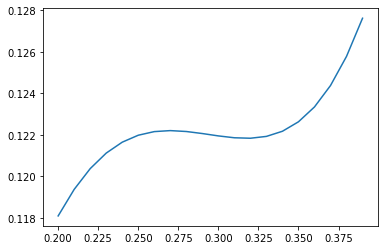

In [9]:
t = 1.155
print(oev(t))
x = np.arange(.2, .4, .01)
y = gvdw_vhsi(x, t=t)
plt.plot(x, y)
plt.show()

### Widgets

### Pressure checkboxes

#### vdw

In [10]:
lo = Layout(width='auto', height='auto')
vdwl = []
vdw = widgets.Checkbox(value=False,
                       description='vdw',
                       disabled=False,
                       indent=False,
                       layout=lo)
vdwl.append(vdw)

#### GvdW(S)

In [11]:
gvdws = widgets.Checkbox(value=False,
                         description='GvdW(S)',
                         disabled=False,
                         indent=False,
                         layout=lo)
vdwl.append(gvdws)

#### GvdW(HS-B2)

In [12]:
w_gvdwhsb2 = widgets.Checkbox(value=False,
                              description='GvdW(HS-B2)',
                              disabled=False,
                              indent=False,
                              layout=lo)
vdwl.append(w_gvdwhsb2)

#### GvdW(I)

In [13]:
w_gvdwi = widgets.Checkbox(value=False,
                           description='GvdW(I)',
                           disabled=False,
                           indent=False,
                           layout=lo)
vdwl.append(w_gvdwi)

#### GvdW(CS)

In [14]:
w_gvdwcs = widgets.Checkbox(value=False,
                            description='GvdW(CS)',
                            disabled=False,
                            indent=False,
                            layout=lo)
vdwl.append(w_gvdwcs)

#### GvdW(VHS-I)

In [15]:
w_gvdwvhsi = widgets.Checkbox(value=False,
                            description='GvdW(VHS-I)',
                            disabled=False,
                            indent=False,
                            layout=lo)
vdwl.append(w_gvdwvhsi)

In [16]:
vdwcorr = widgets.Checkbox(value=False,
                           description='vdw-corr',
                           disabled=True,
                           indent=False,
                           layout=lo)

gvdwscorr = widgets.Checkbox(value=False,
                             description='GvdW(S)-corr',
                             disabled=True,
                             indent=False,
                             layout=lo)

gvdwhsb2corr = widgets.Checkbox(value=False,
                                description='GvdW(HS-B2-corr)',
                                disabled=True,
                                indent=False,
                                layout=lo)

gvdwicorr = widgets.Checkbox(value=False,
                             description='GvdW(I-corr)',
                             disabled=True,
                             indent=False,
                             layout=lo)

#### Pressure checkbox frame

In [17]:
lo2 = {'border': '1px solid black'}
lab_left = widgets.Label("Equations of State", layout=lo)
hline = widgets.Label("With linear correlations")
left = widgets.VBox([
    lab_left, vdw, gvdws, w_gvdwhsb2, w_gvdwi, w_gvdwcs, w_gvdwvhsi, hline,
    vdwcorr, gvdwscorr, gvdwhsb2corr, gvdwicorr
],
                    layout=lo2)

#### Scaling Parameters

In [18]:
scale = widgets.RadioButtons(
    options=['Lennard-Jones Parameters', 'Critical Parameters'],
    value='Lennard-Jones Parameters',
    # rows=10,
    description='Scaling:',
    disabled=False,
    layout=lo)

In [19]:
ivar = widgets.RadioButtons(
    options=['Density', 'Volume'],
    value='Density',
    # rows=10,
    description='Ind. Variable:',
    disabled=False,
    layout=lo)

coex = widgets.Checkbox(value=False,
                        description='Coexistence tie line',
                        disabled=False,
                        indent=False,
                        layout=lo)

spin = widgets.Checkbox(value=False,
                        description='Mark spinodal limits',
                        disabled=False,
                        indent=False,
                        lauout=lo)

rhomin = widgets.FloatSlider(
    value=.001,
    min=0.001,
    max=0.9,
    step=0.001,
    description='Min density:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

rhomax = widgets.FloatSlider(
    value=.9,
    min=0.001,
    max=0.9,
    step=0.001,
    description='Max density:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

# vs = 1./.9
# vf = 1000.
# vmin = widgets.FloatSlider(
#     value=vs,
#     min=vs,
#     max=vf,
#     step=0.1,
#     description='Min volume:',
#     disabled=True,
#     continuous_update=False,
#     orientation='horizontal',
#     readout=True,
#     readout_format='.1f',
# )

# vmax = widgets.FloatSlider(
#     value=vf,
#     min=vs,
#     max=vf,
#     step=0.1,
#     description='Max volume:',
#     disabled=True,
#     continuous_update=False,
#     orientation='horizontal',
#     readout=True,
#     readout_format='.1f',
# )

# rholink1 = widgets.jslink((rhomin, 'max'), (rhomax, 'min'))
# rholink2 = widgets.jslink((rhomax, 'value'), (rhomin, 'max'))

# vlink1 = widgets.jslink((vmin, 'value'), (vmax, 'min'))
# vlink2 = widgets.jslink((vmax, 'value'), (vmin, 'max'))

b = widgets.Button(
    description='Do Plot',
    disabled=False,
    button_style='danger',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check',
    layout=lo)  # (FontAwesome names without the `fa-` prefix)

temp = widgets.BoundedFloatText(value=1,
                                min=.5,
                                max=3,
                                step=0.1,
                                description='T:',
                                disabled=False,
                                layout=lo)

stat = widgets.Textarea(value='Select Equation of States',
                        placeholder='',
                        description='Status:',
                        rows=5,
                        disabled=True,
                        layout=lo)

out = widgets.Output()
lab_right = widgets.Label("Plotting Parameters", layout=lo)
right = widgets.VBox(
    [lab_right, scale, ivar, coex, spin, rhomin, rhomax, temp, b], layout=lo2)

lo3 = Layout(width='300px', height='auto')
plotout = widgets.Output(layout=lo)

all = widgets.HBox([left, right, plotout])

# x = np.arange(0, 1, .01)
# y = x * x
# plt.plot(x, y)

# with plotout:
#     print("Dummy plot")
#     plt.show()

In [20]:
# def on_change_ivar(change):
#     with out:
#         out.clear_output()
#         print(change['new'])
#         print(type(change['new']))
#     if change['new'] == 'Density':
#         setattr(rhomin,'disabled',False)
#         setattr(rhomax,'disabled',False)
#     if change['new'] == 'Volume':
#         setattr(rhomin,'disabled',True)
#         setattr(rhomax,'disabled',True)

# ivar.observe(on_change_ivar, names='value')

#### do_plot()

In [21]:
rcParams['figure.figsize'] = 6, 6


# @plotout.capture(wait=False)
def do_plot(btn):
    plotout.clear_output()
    vl = []
    for x in vdwl:
        if (x.value == True):
            vl.append(x.description)

    if len(vl) == 0:
        with plotout:
            print("Select at least one EOS")
            return

    if (coex.value | spin.value) & (len(vl) > 1):
        with plotout:
            print('Tie line and spinodal with single EOS only')
            return

    s = 3. / (2. * np.pi)
    if ('vdw' in vl) & (rhomax.value >= s):
        rhomax.value = s - .01


#         rhomax.value = rhomax.max - .01
#         with plotout:
#             print('rhomax and vmin adjusted \nfor classic van der Waals')
#             return
    else:
        rhomax.max = 0.9

    t = temp.value

    for p in vl:
        press, rhoc, tc, pc = pdic[p]
        if (coex.value | spin.value) and (t >= tc):
            with plotout:
                print(
                    "Enter temperature less than critical temperature (%.3f)" %
                    tc)
                return
        xs = rhomin.value
        xf = rhomax.value
        x = np.arange(xs, xf, (xf - xs) / 100.)
        y = press(x, t=t)
        v = 1. / x
        vc = 1. / rhoc
        if coex.value | spin.value:
            if p in ['vdw', 'GvdW(S)']:
                fn = lambda x: gasdic[p](x[0]) - t / tc
                soln = fsolve(fn, [.1])
                rgas = soln[0] * rhoc
                fn = lambda x: liqdic[p](x[0]) - t / tc
                soln = fsolve(fn, [.1])
                rliq = soln[0] * rhoc
            else:
                rgas = gasdici[p](t)
                #                 rliq = liqdici[p](t)
                p0 = press(rgas, t=t)
                fn = lambda x: press(x[0], t=t) - p0
                with plotout:
                    soln = fsolve(fn, [.9])
                    #                     print(soln)
                    s = list(soln)
                    s.sort()
                    rliq = s[-1]
            vgas = 1. / rgas
            vliq = 1. / rliq
            cpress = press(rgas, t=t)
            with plotout:
                print("Coexistent Densities: %.3f %.3f" % (rgas, rliq))
                print("Coexistence Pressure: %.3f" % cpress)
        if spin.value:
            xs = rhomin.min
            xf = rhomax.max
            xx = np.arange(xs, xf, (xf - xs) / 1000.)
            pr = press(xx, t=t)
            n = len(xx)
            for i in range(n - 1):
                if pr[i + 1] < pr[i]:
                    break
            gas_sp_rho = xx[i]
            gas_sp_press = pr[i]
            j = i + 1
            for i in range(j, n - 1):
                if pr[i + 1] > pr[i]:
                    break
            liq_sp_rho = xx[i]
            liq_sp_press = pr[i]
            liq_sp_v = 1. / liq_sp_rho
            gas_sp_v = 1. / gas_sp_rho

            with plotout:
                print("Gas Spinodal Limit: %.3f %.3f" %
                      (gas_sp_rho, gas_sp_press))
                print("Liquid Spinodal Limit: %.3f %.3f" %
                      (liq_sp_rho, liq_sp_press))

        if ivar.value == 'Density':
            if scale.value == 'Lennard-Jones Parameters':
                plt.xlabel("rho*sigma**3", size=12)
                plt.ylabel("P*sigma**3/epsilon", size=12)
                plt.plot(x, y, label=p)
            else:
                plt.xlabel("rho/rhoc", size=12)
                plt.ylabel("P/Pc", size=12)
                plt.plot(x / rhoc, y / pc, label=p)
            if coex.value:
                plt.plot([rgas, rliq], [cpress, cpress],
                         ls="--",
                         label="Tie line")
            if spin.value:
                plt.plot([gas_sp_rho, liq_sp_rho],
                         [gas_sp_press, liq_sp_press],
                         'o',
                         c='r',
                         label="Spinodal limits")
        else:

            if scale.value == 'Lennard-Jones Parameters':
                plt.xlabel("v/sigma**3", size=12)
                plt.ylabel("P*sigma**3/epsilon", size=12)
                plt.plot(v, y, label=p)
            else:
                plt.xlabel("v/vc", size=12)
                plt.ylabel("P/Pc", size=12)
                plt.plot(v / vc, y / pc, label=p)
            if coex.value:
                plt.plot([vgas, vliq], [cpress, cpress],
                         ls="--",
                         label="Tie line")
            if spin.value:
                plt.plot([gas_sp_v, liq_sp_v], [gas_sp_press, liq_sp_press],
                         'o',
                         c='r',
                         label="Spinodal limits")

    plt.legend()
    with plotout:
        plt.show()

b.on_click(do_plot)

display(all)

## Explanation of GUI

Here is my first idea for an app (application) for the GvdW material. This non-working GUI (graphic user interface) will hopefully convey my intent with this app. 
The general intent is to let the user plot any combination (or just one) of the various van der Waals EOS's isotherms.
Here is the functionality of the GUI:

- Equations of State - this area would allow the user to select any combination of EOSs to plot through a series of check boxes. In the working app it would include all of the EOS's that I have done the coexistence curves for. 
- Plotting Parameters - this area allows the user to specify required parameters for the plot
  - checkbox for scaling with respect to critical parameters for each EOS
  - checkbox for plotting the Maxwell coexistence tie line if plotting only one EOS
  - checkbox for marking spinodal limits if below critical temperature
  - slider for setting the minimum density for which the EOS is to be plotted. This value can also be added manually in the entry box to the right of the slider.
  - slider for setting the maximum density for which the EOS is to be plotted. This value can also be added manually in the entry box to the right of the slider.
  - number entry box for setting the temperature for the isotherm. 

- Do Plot - this button would do the calculations and plot the resulting EOS's in a plot area to the right of the GUI. In the course of doing the calculation, it would check for input errors such as

  - no EOS selected (as denoted by message currently in plot area)
  - minimum density >= maximum density
  - invalid maximum density for a particular EOS


## Exercises

If you can see how this tool might be a good teaching aid, I think the best use would be a good set of exercises to illustrate various points about van der Waals EOSs. I can think of a couple in general terms:

- van der Waals loops
- differences between EOSs

I expect that you would be better suited than myself in devising these exercises or "thought experiments."

Let me know what you think about the app's GUI and what it could be used for in an educational context.